# A Beginner Visualizing Goalkeeper Performance in the Premier League - Part 2 of 3

In [3]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

## 1. Data preparation

Load in our data

In [4]:
#normal stats including save%, clean sheets and penalty saves
df_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/epl_gk_stats.csv", index_col="Rk")

#advanced stats including crosses, goal kicks and passes
df_adv_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/epl_gk_adv_stats.csv", index_col="Rk")

FileNotFoundError: [Errno 2] File c:/Users/Christian/OneDrive/football_analysis/data/epl_gk_stats.csv does not exist: 'c:/Users/Christian/OneDrive/football_analysis/data/epl_gk_stats.csv'

General information about dataset

In [3]:
#general information about our data set
#df_adv_stats.head()

### 1.1. Cleaning dataset

Fill empty cells

In [4]:
df_stats.isnull().sum()
df_stats.fillna(0.5, inplace=True)

Remove GK's with less than 600 minutes played

In [5]:
df_stats = df_stats.drop(df_stats[df_stats["Min"] < 600].index)

df_adv_stats = df_adv_stats.drop(df_adv_stats[df_adv_stats["90s"] < 7].index)

Remove double Player name

In [6]:
#clean player names
df_stats["Player"] = [name.split("\\")[0] for name in df_stats["Player"]]
df_adv_stats["Player"] = [name.split("\\")[0] for name in df_adv_stats["Player"]]

### 1.2. Calculating metrics

In [7]:
#saves per match
df_stats["Sv/90"] = df_stats["Saves"] / (df_stats["Min"]/90)

#saves per goal
df_stats["Sv/GA"] = df_stats["Saves"] / df_stats["GA"]

#GSAA
#first we calculate how many saves an average GK would have saved if he faced the same amount of shots as our GK
df_stats["SvavgSv%"] = (df_stats["Save%"].mean()*df_stats["SoTA"])
#with SvavgSv% we can then calculate how many goals our team/GK would have let in if our GK performed as an average GK
df_stats["GAavgSv%"] = df_stats["SoTA"] - df_stats["SvavgSv%"]
#with GAavgSv% we can calculate how many more or less goals our GK have saved, that an average GK wouldn¨t had saved
df_stats["GSAA"] = df_stats["GAavgSv%"] - df_stats["GA"]

#xSv%
df_stats["xSv%"] = ((df_stats["SoTA"] - df_adv_stats["PSxG"])/df_stats["SoTA"])*100

#aSv%
df_stats["aSv%"] = ((df_stats["Save%"]*100) - df_stats["xSv%"])

## 2. Data analysis 

### 2.1. GAavgSv%

Visualize with a barplot, with GA in darkred and GAavgSv% in cyan

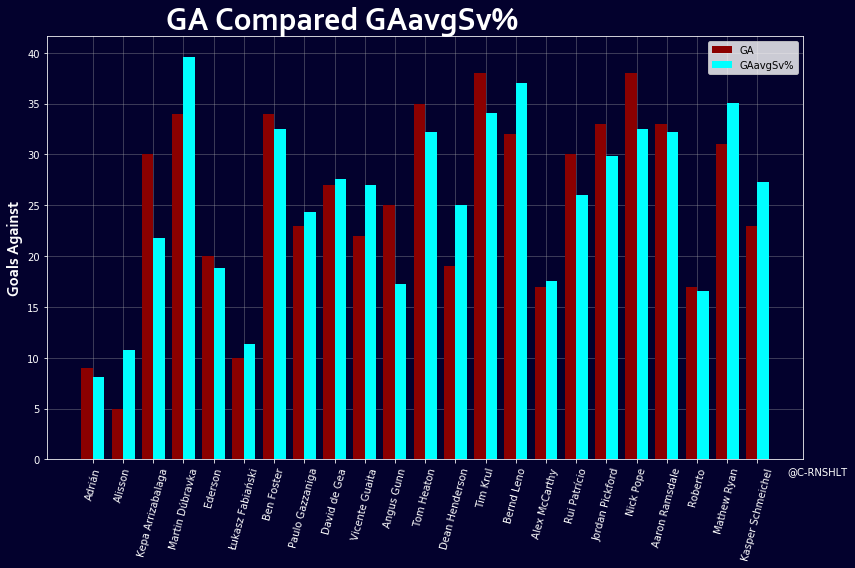

In [8]:
#sort 1st plot
y2 = df_stats["GAavgSv%"]
y1 = df_stats["GA"]

#set x position for labels
x = np.arange(len(df_stats["GA"]))

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot baprlot
width=0.38
p1 = ax.bar(x - width/2, y1, width=width, 
         color="darkred", label="GA", zorder=3)
p2 = ax.bar(x + width/2, y2, width=width,
         color="cyan", label="GAavgSv%", zorder=3)

#add x and y labels
ax.set_ylabel("Goals Against",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(df_stats["Player"], rotation=75)

#add title
ax.set_title("GA Compared GAavgSv%", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#color spines & ticks and add grid
ax.tick_params(axis="both", colors="white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature & legend
ax.text(xmax+22, ymin-1.5, "@C-RNSHLT", color="white")
ax.legend()

plt.tight_layout()

#plt.savefig("output/NAME_OF_FILE_BARH.png", dpi=300,facecolor="#03012d");

Create table where you see the GA & GAavgSv% compared

### 2.2. GSAA

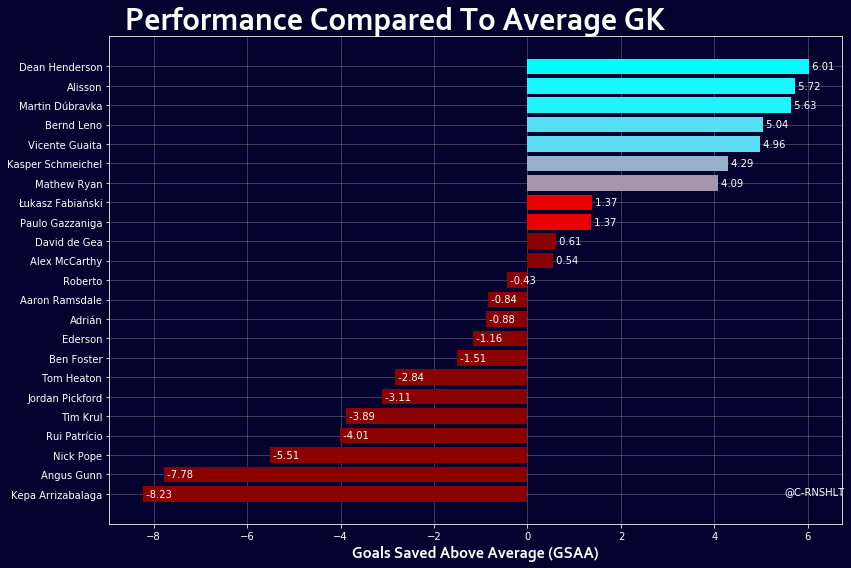

In [9]:
#sort 1st plot
x = df_stats.sort_values("GSAA")["Player"]
y = df_stats.sort_values("GSAA")["GSAA"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 6 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Goals Saved Above Average (GSAA)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Performance Compared To Average GK", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/NAME_OF_FILE_BARH.png", dpi=300,facecolor="#03012d");

### 2.3. GSAE/90 (oTxG - GA)

Visualize with barh around 0 (Jose Perez for inspiration)

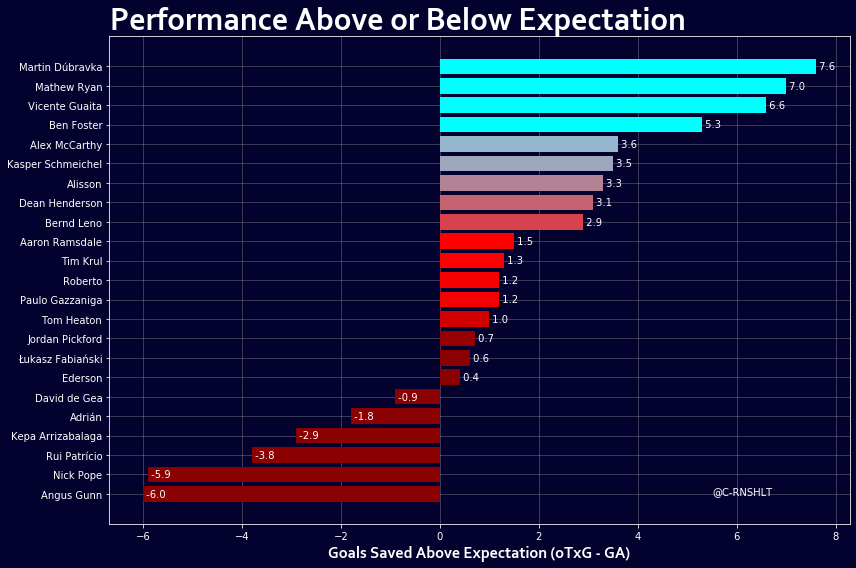

In [11]:
#sort 1st plot
x = df_adv_stats.sort_values("PSxG+/-")["Player"]
y = df_adv_stats.sort_values("PSxG+/-")["PSxG+/-"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 5 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Goals Saved Above Expectation (oTxG - GA)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Performance Above or Below Expectation", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("output/EPL_GSAE_barh.png", dpi=300,facecolor="#03012d");

### 2.4. xSv% (expected Sv%)

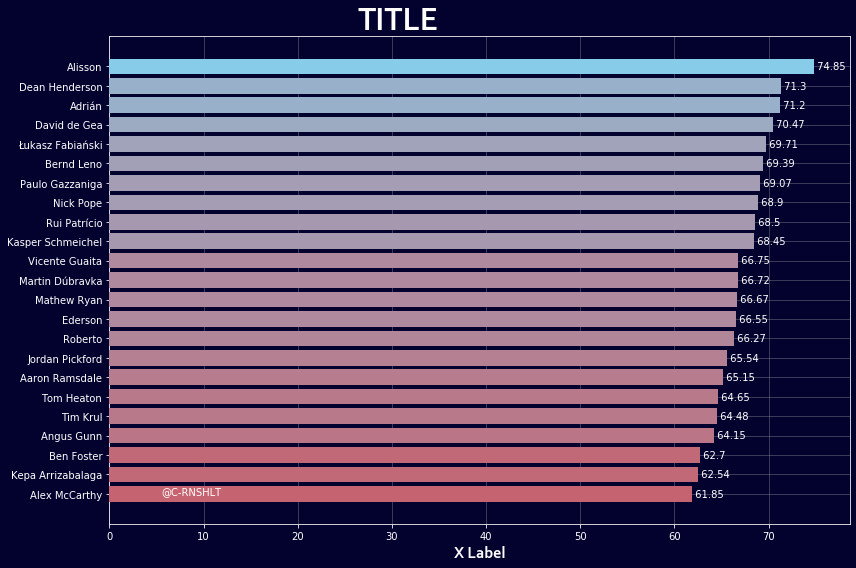

In [12]:
#sort 1st plot
x = df_stats.sort_values("xSv%")["Player"]
y = df_stats.sort_values("xSv%")["xSv%"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 100 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("X Label",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("TITLE", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/NAME_OF_FILE_BARH.png", dpi=300,facecolor="#03012d");

### 2.5. aSv% (adjusted Sv%) 

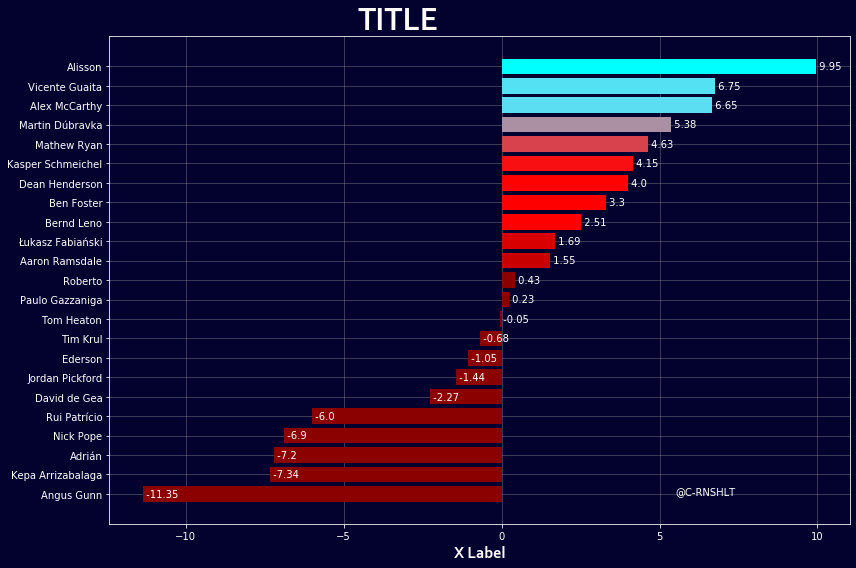

In [15]:
#sort 1st plot
x = df_stats.sort_values("aSv%")["Player"]
y = df_stats.sort_values("aSv%")["aSv%"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 8 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("X Label",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("TITLE", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/NAME_OF_FILE_BARH.png", dpi=300,facecolor="#03012d");

### 2.6. aSv% vs GSAA

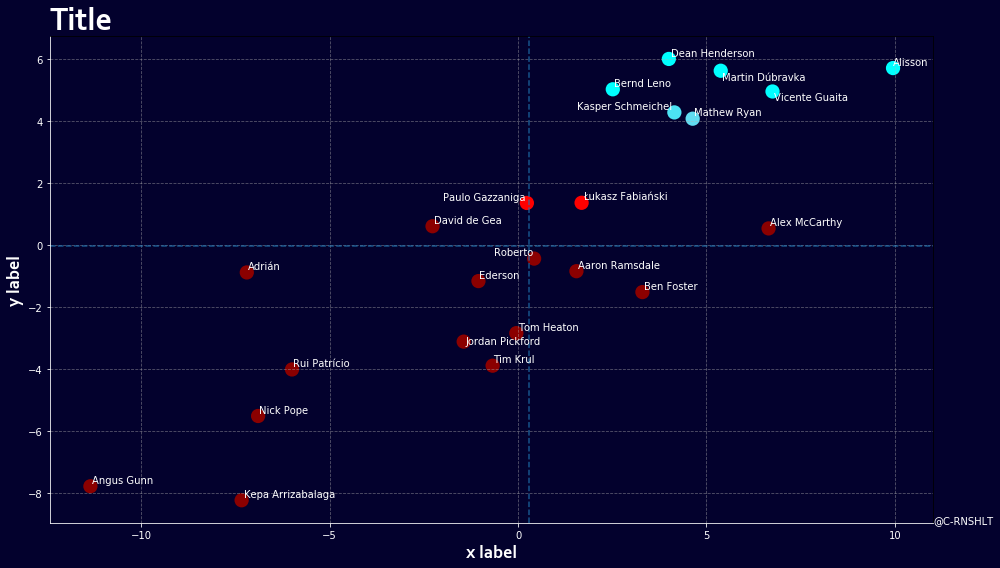

In [14]:
#When copy change data, name of labels, title and output file
x = df_stats["aSv%"]
y = df_stats["GSAA"]
names = df_stats["Player"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 5 #highest value on y or x axis

#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8), facecolor="#03012d")

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#create our plot
plt.scatter(x, y, s=150, 
            color=rvb(y/N), lw=2)

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#add mean lines & grid
ax.axvline(x.mean(), linestyle='--', alpha=0.7)
ax.axhline(y.mean(), linestyle='--', alpha=0.7)
ax.grid(linestyle="--", alpha=0.5)

#adding text
ax.set_xlabel("x label", color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("y label", fontsize=18, color="white", fontname="Corbel", fontweight="bold")
ax.set_title("Title", color="white", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#change colour of axis and ticks
ax.tick_params(axis="both", colors="white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

#Create labels for each GK
text = [ax.annotate(txt, xy = (x.iloc[i], y.iloc[i]), ha="right", color="white") 
        for i, txt in enumerate(names)]
#txt is the text added, xy is coordinates of location

#prevent overlapping text
adjust_text(text)

#add signature
ax.text(xmax, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/NAME_OF_FILE.png", dpi=300, facecolor="#03012d");